In [1]:
import numpy as np

3.3.3 신경망에서의 행렬 곱

In [2]:
X = np.array([1, 2])
X.shape

(2,)

In [3]:
W = np.array([[1,3,5],[2,4,6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [4]:
W.shape


(2, 3)

In [5]:
Y = np.dot(X,W)

In [6]:
print(Y)

[ 5 11 17]


# 3층 신경망 구현하기
 
 3.4.2 각 층의 신호 전달 구현하기

In [11]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X,W1) +B1

(2, 3)
(2,)
(3,)


In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Z1 = sigmoid(A1)

In [24]:
W2 = np.array([[0.1, 0.4],[0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)



(3,)
(3, 2)
(2,)


In [16]:
import matplotlib.pyplot as plt

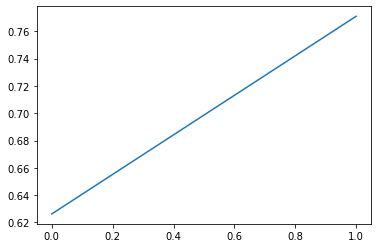

In [23]:

plt.plot(Z2)

plt.show()

In [25]:
def identity_function(x):
    return x

In [27]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

3.4.3 구현 정리 

init_network() 와 forward() 함수를 정의. init 함수는 가중치와 편향을 초기화하고 이들을 딕셔너리 변수인 network에 저장합니다. network에는 각 층에 필요한 매개변수(가중치와 편향)을 저장합니다. forward함수는 입력 신호를 출력으로 변환하는 처리 과정을 모두 구현한다. (순방향)


In [31]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4],[0.2, 0.5],[0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y) 

[0.31682708 0.69627909]


# 3.5 출력층 설계하기

3.5.1 항등함수와 소프트맥스 함수 구현하기

 항등 함수는 입력과 출력이 같다는 뜻.  
 
 소프트맥스 함수
 $$y_k = \frac{exp(a_k)}{\sum_{i = 1}^ {n}  exp(a_i)}$$

In [35]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [36]:
def softmax(a):
    exp_a  = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

3.5.2 소프트맥스 함수 구현 시 주의 점

 지수함수 꼴이므로, 컴퓨터 계산시 오버플로가 발생할 가능성이 크다. 소프트맥스 함수 분모,분자에 상수 C를 곱해주어 보정해준다. C는 주로 
 (-최대값) 꼴로 나타냄.
 

In [37]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))  
 
    
# 계산이 제대로 이루어 지지 않음

C:\Users\82102\AppData\Local\Temp/ipykernel_11228/518197229.py:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
C:\Users\82102\AppData\Local\Temp/ipykernel_11228/518197229.py:2: RuntimeWarning: invalid value encountered in true_divide
  np.exp(a) / np.sum(np.exp(a))


array([nan, nan, nan])

In [38]:
c = np.max(a)

a - c

array([  0, -10, -20])

In [39]:
np.exp(a - c)/np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [42]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return  y

In [43]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)   #출력값은 0~1 사이의 값을 갖는다.

np.sum(y)  # 소트프맥스 함수의 총합은 1이다.  출력을 확률로 해석할 수 있다.

[0.01821127 0.24519181 0.73659691]


1.0

In [1]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten = True, normalize = False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(x_test.shape)

ModuleNotFoundError: No module named 'dataset.mnist'